#**Feature scaling**



Feature scaling is an important step in data preparation, especially when preparing your data to build machine learning models and deploy in the cloud. 

The two most common Feature Scaling techniques are:
1. **Standardization**
2. **Normalisation**

Let's take look at these concepts in detail below

#**Standardization Vs Normalisation**

***Normalization:*** Normalization is the process of rescaling one or more attributes to the range of 0 to 1. This means that the largest value for each attribute is 1 and the smallest value is 0.

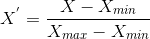
<br>

**Xmax**= maximum value

**Xmin**= Minimum value 

When the value of X is the minimum value in the column, the numerator will be 0, and hence X’ is 0
On the other hand, when the value of X is the maximum value in the column, the numerator is equal to the denominator and thus the value of X’ is 1
If the value of X is between the minimum and the maximum value, then the value of X’ is between 0 and 1.

<br>

***Standardization:*** typically means rescales data to have a mean of 0 and a standard deviation of 1 (unit variance).

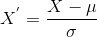

image.png is the mean of the feature values and image.pngis the standard deviation of the feature values. Note that in this case, the values are not restricted to a particular range.



<br>

**NB**: Be cautous of [**Data Leakage**](https://colab.research.google.com/drive/17Y4VMlAtrVMdDBxBd9D6UDrb0Mzu71SR?usp=sharing) when doing Normalisation or Standardisation

<br>

##**When To Use Normalisation or Standization**

To be frank, there is no golden rule as to when to apply either Normalisation or Standardization. In fact, your business problem and more or less your domain knowledge should guide you as to wether to normalise or standadize.

However, more generally, you can apply ***Normalisation*** when the ***distribution of your data does not follow a Gaussian distribution.***
This helps distance based algorithms such as **SVM**, **KNN**, **KMeans**, etc.

#**Method of Feature Scaling**

1. StandardScaler
2. MinMaxScaler
4. RobustScaler
4. Normalizer

##**StandardScaler**

The StandardScaler assumes your data is normally distributed within each feature and will scale them such that the distribution is now centred around 0, with a standard deviation of 1.

The mean and standard deviation are calculated for the feature and then the feature is scaled based on:

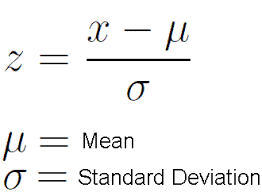

**NB**: this is best used when the data is normally distrubetd. You can refer to the [Feature Transformation](https://colab.research.google.com/drive/1T5qRb3z9eeeuPx7CuWki4uz4sOGw3U8u?usp=sharing) notebook to learn how to make your data approach normal distribution(Gausian)

In [1]:
#import the necessary libraries

import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.style.use('ggplot')
%matplotlib inline

Let's generate hypothetical data points using the numpy random.normal

In [2]:
np.random.seed(1)
df = pd.DataFrame({
    'x1': np.random.normal(0, 2, 10000),
    'x2': np.random.normal(3, 5, 10000),
    'x3': np.random.normal(-5, 5, 10000)
})

In [3]:
df

,x1,x2,x3
0,3.248691,2.387630,-14.657819
1,-1.223513,4.140849,-5.802131
2,-1.056344,1.238474,-9.161098
3,-2.145937,-1.152767,-6.030558
4,1.730815,1.694551,0.131275
...,...,...,...
9995,0.145917,-1.716042,-1.550878
9996,0.978204,6.911079,-2.235902
9997,-2.028288,15.042169,-5.419191
9998,-0.125392,7.413928,-11.417673


Apply Standard Scaler

In [4]:
#Use SKlearn's StandardScaler

scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=['x1', 'x2', 'x3'])
scaled_df

,x1,x2,x3
0,1.616535,-0.131753,-1.924757
1,-0.622285,0.218475,-0.146416
2,-0.538598,-0.361311,-0.820942
3,-1.084057,-0.838991,-0.192287
4,0.856675,-0.270204,1.045092
...,...,...,...
9995,0.063263,-0.951512,0.707293
9996,0.479912,0.771862,0.569731
9997,-1.025161,2.396149,-0.069516
9998,-0.072557,0.872313,-1.274092


In [5]:
scaled_df['x1'].std()

1.0000500037503115

In [6]:
scaled_df['x2'].std()

1.0000500037503108

In [7]:
scaled_df['x3'].std()

1.0000500037503137

Plot the new data

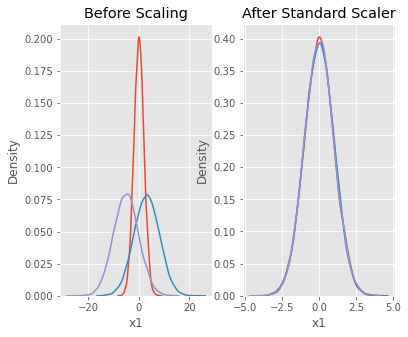

In [8]:
#plotting before scaling and after scaling data

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))

#Before Scaling

ax1.set_title('Before Scaling')
sns.kdeplot(df['x1'], ax=ax1)
sns.kdeplot(df['x2'], ax=ax1)
sns.kdeplot(df['x3'], ax=ax1)

#After Scaling

ax2.set_title('After Standard Scaler')
sns.kdeplot(scaled_df['x1'], ax=ax2)
sns.kdeplot(scaled_df['x2'], ax=ax2)
sns.kdeplot(scaled_df['x3'], ax=ax2)
plt.show()

Now we can see observe that no feature dominates the other after Standard scaler. All of them are now having a standard scale, hence the name standard scaler.

---



#Let's do it on a dataset

In [11]:
df=pd.read_csv('C:/Users/Aabha Gupta/Downloads/workbench-dataset/diabetes.csv',encoding='utf-8')
df.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


We can see that the dataset above is having features with different ranges, ie. some have high values, as high as 168+ and some have low values, as low as 0. 
Distance based algorithms such as SVM will not work well on this dataset, features with high values will dominate features with low values. 

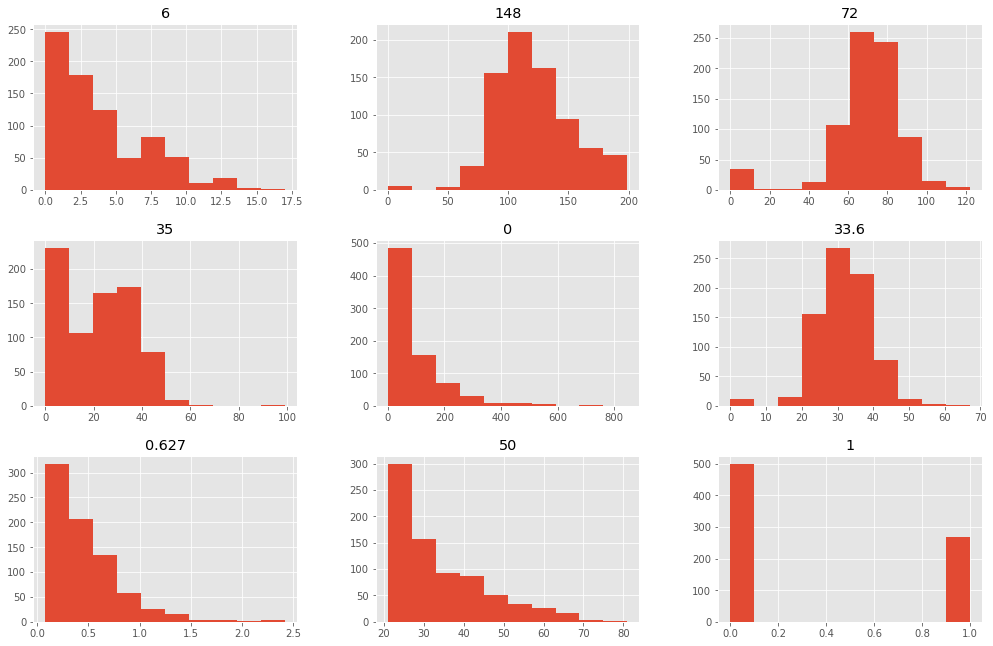

In [12]:
df.hist(figsize=(17,11))
plt.show()

Considering the x-axis, we can see the features have huge differences in scale. Let's bring harmony in them by applyinng Standard Scaler below.

Let's apply **Standard Scaler** on our dataset

In [13]:

scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(np.round(scaled_df,2),columns=df.columns)
scaled_df

,6,148,72,35,0,33.6,0.627,50,1
0,-0.84,-1.12,-0.16,0.53,-0.69,-0.68,-0.36,-0.19,-0.73
1,1.23,1.94,-0.26,-1.29,-0.69,-1.10,0.60,-0.10,1.37
2,-0.84,-1.00,-0.16,0.16,0.12,-0.49,-0.92,-1.04,-0.73
3,-1.14,0.51,-1.50,0.91,0.76,1.41,5.48,-0.02,1.37
4,0.34,-0.15,0.25,-1.29,-0.69,-0.81,-0.82,-0.27,-0.73
...,...,...,...,...,...,...,...,...,...
762,1.83,-0.62,0.36,1.72,0.87,0.12,-0.91,2.54,-0.73
763,-0.55,0.04,0.05,0.41,-0.69,0.61,-0.40,-0.53,-0.73
764,0.34,0.00,0.15,0.16,0.28,-0.73,-0.68,-0.27,-0.73
765,-0.84,0.16,-0.47,-1.29,-0.69,-0.24,-0.37,1.17,1.37


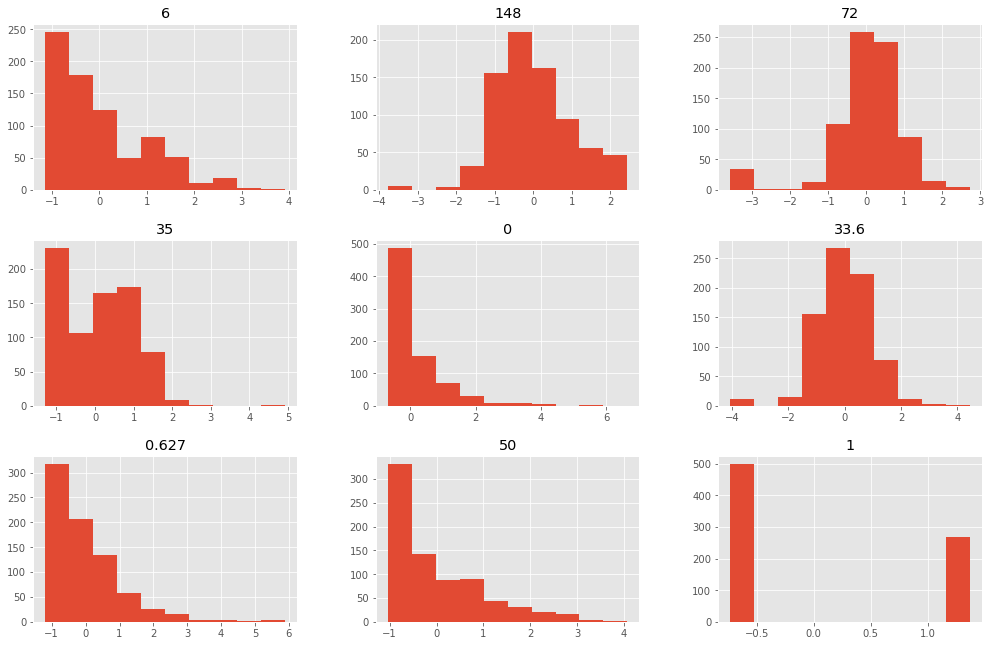

In [14]:

scaled_df.hist(figsize=(17,11))
plt.show()

Now we can see some harmony in the scale. There is not too much difference in the scales.

##**Min-Max Scaler**(Normalisation)

The MinMaxScaler shrinks the range such that the ***range is between 0 and 1*** or **-1** to **1** if there are negative values.

If the distribution is not Gaussian or the standard deviation is very small, the min-max scaler works better.


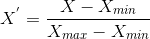
<br>


**Xmax**= maximum value

**Xmin**= Minimum value 

When the value of X is the minimum value in the column, the numerator will be 0, and hence X’ is 0
On the other hand, when the value of X is the maximum value in the column, the numerator is equal to the denominator and thus the value of X’ is 1
If the value of X is between the minimum and the maximum value, then the value of X’ is between 0 and 1.


It is also important to note that the MinMaxScaler is sensitive to outliers and therefore if there are outliers in the data, you might want to consider the **Robust Scaler** which will see soon below.



<br>


Let's generate hypothetical data points using the numpy random.normal

In [15]:
df = pd.DataFrame({
    # positive skew
    'x1': np.random.chisquare(8, 1000),
    # negative skew 
    'x2': np.random.beta(8, 2, 1000) * 40,
    # no skew
    'x3': np.random.normal(50, 3, 1000)
})


Apply **MinMaxScaler**

In [16]:
scaler = preprocessing.MinMaxScaler()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=['x1', 'x2', 'x3'])

**Visualise**

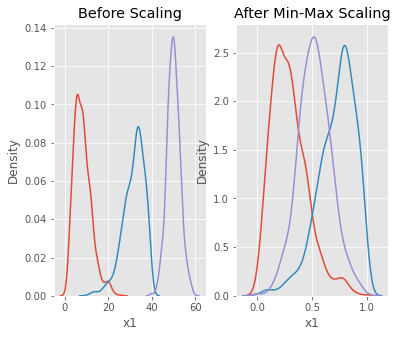

In [17]:

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))

#before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(df['x1'], ax=ax1)
sns.kdeplot(df['x2'], ax=ax1)
sns.kdeplot(df['x3'], ax=ax1)

#after scaling
ax2.set_title('After Min-Max Scaling')
sns.kdeplot(scaled_df['x1'], ax=ax2)
sns.kdeplot(scaled_df['x2'], ax=ax2)
sns.kdeplot(scaled_df['x3'], ax=ax2)
plt.show()

We can see that irrespective of the skewness in the data, the distributions are brought into the same scale so that they overlap.

<br>

##**Robust Scaler**

The RobustScaler turns to be robust to outliers. It uses a similar method to the Min-Max scaler but it instead uses the interquartile range, rathar than the min-max which makes it quite robust to outliers.

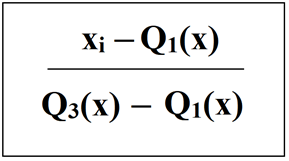

Let's generate hypothetical data points using the numpy random.normal

In [18]:

x = pd.DataFrame({
    # Distribution with lower outliers
    'x1': np.concatenate([np.random.normal(20, 1, 1000), np.random.normal(1, 1, 25)]),
    # Distribution with higher outliers
    'x2': np.concatenate([np.random.normal(30, 1, 1000), np.random.normal(50, 1, 25)]),
})

Apply **MinMaxScaler**

In [19]:

scaler = preprocessing.MinMaxScaler()
minmax_scaled_df = scaler.fit_transform(x)
minmax_scaled_df = pd.DataFrame(minmax_scaled_df, columns=['x1', 'x2'])

Apply **RobustScaler**

In [20]:

scaler = preprocessing.RobustScaler()
robust_scaled_df = scaler.fit_transform(x)
robust_scaled_df = pd.DataFrame(robust_scaled_df, columns=['x1', 'x2'])

***Let's plot the two Scalers together(MinMax Scaler Vs Robust Scaler)***

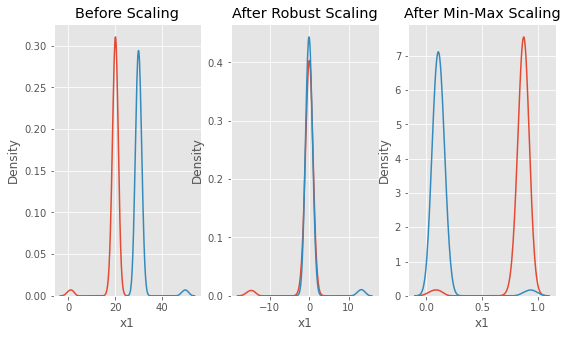

In [21]:

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(9, 5))

#original
ax1.set_title('Before Scaling')
sns.kdeplot(x['x1'], ax=ax1)
sns.kdeplot(x['x2'], ax=ax1)

#robust
ax2.set_title('After Robust Scaling')
sns.kdeplot(robust_scaled_df['x1'], ax=ax2)
sns.kdeplot(robust_scaled_df['x2'], ax=ax2)

#min_max
ax3.set_title('After Min-Max Scaling')
sns.kdeplot(minmax_scaled_df['x1'], ax=ax3)
sns.kdeplot(minmax_scaled_df['x2'], ax=ax3)
plt.show()

Notice that after **Robust scaling**, the distributions are brought into the same scale and overlap, but the outliers remain outside of bulk of the new distributions.

However, in **Min-Max scaling**, the two normal distributions are kept seperate by the outliers that are inside the 0-1 range.

##**Normalizer**

The normalizer scales each value by dividing each value by its magnitude in n-dimensional space for n number of features.

Say your features were x, y and z Cartesian co-ordinates your scaled value for x would be:



In [22]:
df = pd.DataFrame({
    'x1': np.random.randint(-100, 100, 1000).astype(float),
    'y1': np.random.randint(-80, 80, 1000).astype(float),
    'z1': np.random.randint(-150, 150, 1000).astype(float),
})


Apply **Normalizer**

In [23]:

scaler = preprocessing.Normalizer()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)

**Visualise**

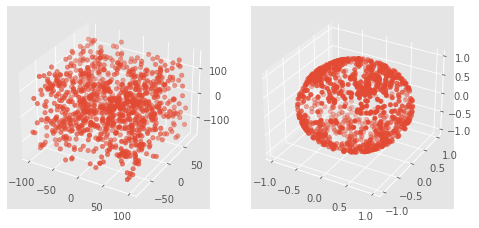

In [24]:
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('ggplot')

fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')
ax1.scatter(df['x1'], df['y1'], df['z1'])
ax2.scatter(scaled_df['x1'], scaled_df['y1'], scaled_df['z1'])
plt.show()

We can see from the above plot that the points are all brought within a sphere that is at most 1 away from the origin at any point. Again, the axes that were previously different scales are all one scale now.